In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data= pd.read_csv('../min_max_norm.csv')


### split data en X et Y

In [3]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)


In [5]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([45116, 45150]))

### ---KNN---

In [6]:
knn = KNeighborsClassifier()
params={'n_neighbors' : [2, 3, 4, 5, 6, 7, 8],
        'metric': ['minkowski','euclidean','manhattan']}

##accuracy
grid_search_acc= GridSearchCV(estimator=knn, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[14560  4800]
 [ 2860 16466]]
----------
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     19360
           1       0.77      0.85      0.81     19326

    accuracy                           0.80     38686
   macro avg       0.81      0.80      0.80     38686
weighted avg       0.81      0.80      0.80     38686

----------


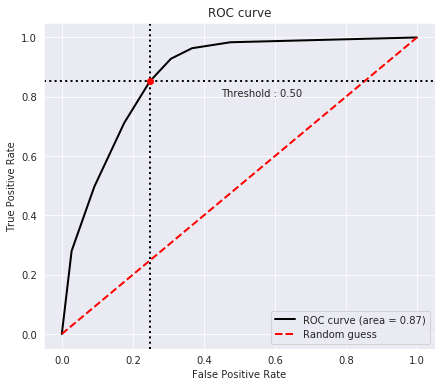

In [7]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('ROC curve')
plt.show()

In [8]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=knn, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [9]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[14560  4800]
 [ 2860 16466]]
----------
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     19360
           1       0.77      0.85      0.81     19326

    accuracy                           0.80     38686
   macro avg       0.81      0.80      0.80     38686
weighted avg       0.81      0.80      0.80     38686

----------


In [10]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=knn, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [11]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[14560  4800]
 [ 2860 16466]]
----------
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     19360
           1       0.77      0.85      0.81     19326

    accuracy                           0.80     38686
   macro avg       0.81      0.80      0.80     38686
weighted avg       0.81      0.80      0.80     38686

----------


In [12]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.74,0.83])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

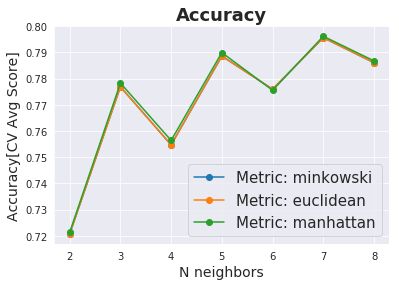

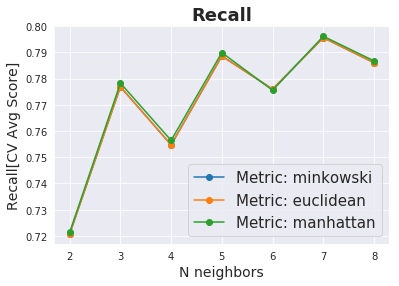

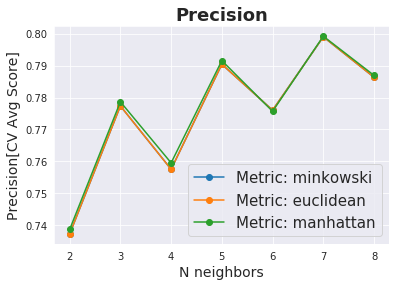

In [13]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Precision')


In [14]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list
index= return_index_list(params['metric'], params['n_neighbors'])

In [15]:
df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                     'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)

## to excel
writer = pd.ExcelWriter('KNN.xlsx')
df.to_excel(writer, 'KNN')
writer.save()
writer.close()

In [16]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[minkowski, 2]",0.720714,0.737297,0.720764,0.000310
"[minkowski, 3]",0.776860,0.777354,0.776852,0.000487
"[minkowski, 4]",0.754692,0.757526,0.754711,0.000410
"[minkowski, 5]",0.788569,0.790412,0.788554,0.000476
"[minkowski, 6]",0.775940,0.776030,0.775943,0.001185
"[minkowski, 7]",0.795593,0.798997,0.795573,0.000366
"[minkowski, 8]",0.786032,0.786332,0.786026,0.000931
"[euclidean, 2]",0.720714,0.737297,0.720764,0.000310
"[euclidean, 3]",0.776860,0.777354,0.776852,0.000487
"[euclidean, 4]",0.754692,0.757526,0.754711,0.000410


In [17]:
grid_search_acc.cv_results_

{'mean_fit_time': array([3.06107831, 2.91894209, 3.4018352 , 3.02349341, 3.00287974,
        2.97635365, 3.53675306, 2.72256768, 5.54297996, 4.99012303,
        4.98747861, 4.96391737, 4.95144308, 5.30702221, 4.91033089,
        5.00186443, 4.67733502, 4.21267211, 4.49460554, 4.30824792,
        4.46770847]),
 'mean_score_time': array([344.7467078 , 357.01538289, 355.91225219, 367.97484243,
        367.15359557, 374.53116691, 376.0919621 , 338.9789201 ,
        331.55001843, 319.03867042, 325.63937891, 326.32707167,
        326.985358  , 327.1556344 , 323.84620821, 334.63322735,
        268.30978882, 259.55411696, 244.3620013 , 244.73635697,
        237.54645824]),
 'mean_test_score': array([0.72071433, 0.7768595 , 0.75469169, 0.78856934, 0.77594   ,
        0.79559303, 0.78603239, 0.72071433, 0.7768595 , 0.75469169,
        0.78856934, 0.77594   , 0.79559303, 0.78603239, 0.72129041,
        0.77826646, 0.75638668, 0.78989874, 0.77550794, 0.79613587,
        0.78671925]),
 'param_metri